# Data Preprocessing 

Подготовка данных, логистичнская регрессия на начальной выборке

In [229]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [230]:
# Importing the dataset
df = pd.read_csv('data_di.csv', sep=',', parse_dates = ['policy_bind_date','incident_date'], dayfirst = True)

In [231]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

Заменяю знак "?" на идентификатор пропущенного значения.

In [233]:
df = df.replace('?',np.NaN)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

Делаю проверку на количество уникальных значений по переменным

In [234]:
df.apply(lambda x: len(x.unique()))
#df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

Удаляю переменные, которые сожержат большое кол-во уникальныз значений и являются неинформативными.

In [235]:
df = df.drop(['insured_zip','policy_number','incident_location','policy_bind_date','incident_date'], axis='columns', inplace=False)
df.head(5)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_csl                   1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_sex                  1000 non-null   object 
 8   insured_education_level      1000 non-null   object 
 9   insured_occupation           1000 non-null   object 
 10  insured_hobbies              1000 non-null   object 
 11  insured_relationship         1000 non-null   object 
 12  capital-gains                1000 non-null   int64  
 13  capital-loss       

In [237]:
# Cheking Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
property_damage,360,0.360
police_report_available,343,0.343
collision_type,178,0.178
fraud_reported,0,0.000
insured_education_level,0,0.000
capital-loss,0,0.000
capital-gains,0,0.000
insured_relationship,0,0.000
insured_hobbies,0,0.000
insured_occupation,0,0.000


Произвожу замену пропущенных значений по переменным. Для 'property_damage' и 'police_report_available' отсутствие данных можно заменить значением "NO". 

In [238]:
df['property_damage'].value_counts()

NO     338
YES    302
Name: property_damage, dtype: int64

In [239]:
df['police_report_available'].value_counts()

NO     343
YES    314
Name: police_report_available, dtype: int64

In [240]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [241]:
df['property_damage'].fillna('NO', inplace = True)

In [242]:
df['property_damage'].value_counts()

NO     698
YES    302
Name: property_damage, dtype: int64

In [243]:
df['police_report_available'].fillna('NO', inplace = True)

In [244]:
df['police_report_available'].value_counts()

NO     686
YES    314
Name: police_report_available, dtype: int64

Для 'collision_type' я решаю для пропущенных данных создать отдельное значение "Unknown"?, а не заменять наиболее частым.

In [245]:
df['collision_type'].fillna('Unknown', inplace = True)

In [246]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
Unknown            178
Name: collision_type, dtype: int64

In [247]:
# Re-Cheking Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
fraud_reported,0,0.0
insured_education_level,0,0.0
incident_type,0,0.0
capital-loss,0,0.0
capital-gains,0,0.0
insured_relationship,0,0.0
insured_hobbies,0,0.0
insured_occupation,0,0.0
insured_sex,0,0.0
auto_year,0,0.0


Вместо переменной 'auto_year', указывающей на год автомобиля, создаю 'auto_age', которая будет указывать на количество лет авто.

In [248]:
df['auto_age'] = 2015 - df['auto_year'] # Deriving the age of the vehicle based on the year value 
df['auto_age'].head()

0    11
1     8
2     8
3     1
4     6
Name: auto_age, dtype: int64

In [251]:
# Function Outliers
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for col_names in num_var:
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std() 
                            if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std() 
                            if y > df[col_names].mean()+3*df[col_names].std() else y)
    return(df)

In [252]:
# Outliers
df = outliers(df)
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,auto_age
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.476176,1.091898e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7397.773749,37928.950000,2005.103000,9.897000
std,115.113174,9.140287,611.864673,243.570287,2.266996e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4818.993582,18886.252893,6.015861,6.015861
min,0.000000,19.000000,500.000000,523.903965,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,0.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,5.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,10.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,15.000000
max,479.000000,64.000000,2000.000000,1987.807651,7.993220e+06,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,21873.748536,79560.000000,2015.000000,20.000000


In [253]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,auto_age
0,328,48,OH,250/500,1000,1406.91,0.0,MALE,MD,craft-repair,...,YES,71610,6510,13020.0,52080,Saab,92x,2004,Y,11
1,228,42,IN,250/500,2000,1197.22,5000000.0,MALE,MD,machine-op-inspct,...,NO,5070,780,780.0,3510,Mercedes,E400,2007,Y,8
2,134,29,OH,100/300,2000,1413.14,5000000.0,FEMALE,PhD,sales,...,NO,34650,7700,3850.0,23100,Dodge,RAM,2007,N,8
3,256,41,IL,250/500,2000,1415.74,6000000.0,FEMALE,PhD,armed-forces,...,NO,63400,6340,6340.0,50720,Chevrolet,Tahoe,2014,Y,1
4,228,44,IL,500/1000,1000,1583.91,6000000.0,MALE,Associate,sales,...,NO,6500,1300,650.0,4550,Accura,RSX,2009,N,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0.0,FEMALE,Masters,craft-repair,...,NO,87200,17440,8720.0,61040,Honda,Accord,2006,N,9
996,285,41,IL,100/300,1000,1436.79,0.0,FEMALE,PhD,prof-specialty,...,NO,108480,18080,18080.0,72320,Volkswagen,Passat,2015,N,0
997,130,34,OH,250/500,500,1383.49,3000000.0,FEMALE,Masters,armed-forces,...,YES,67500,7500,7500.0,52500,Suburu,Impreza,1996,N,19
998,458,62,IL,500/1000,2000,1356.92,5000000.0,MALE,Associate,handlers-cleaners,...,YES,46980,5220,5220.0,36540,Audi,A5,1998,N,17


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_csl                   1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   float64
 7   insured_sex                  1000 non-null   object 
 8   insured_education_level      1000 non-null   object 
 9   insured_occupation           1000 non-null   object 
 10  insured_hobbies              1000 non-null   object 
 11  insured_relationship         1000 non-null   object 
 12  capital-gains                1000 non-null   int64  
 13  capital-loss       

In [255]:
# Cheking categorical data
dfs = df[['policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation',
          'insured_hobbies','insured_relationship','incident_type','collision_type',
          'incident_severity','authorities_contacted','incident_state','incident_city','property_damage',
          'police_report_available','auto_make','auto_model','fraud_reported']]
info = []
for column in dfs.columns:
        vals = {"col": column,
                "nunique": dfs[column].nunique(),
                "unique": dfs[column].unique(),
                "type": dfs[column].dtype
               }
        info.append(vals)
pd.DataFrame(info).sort_values(by = "col", ascending = False)

,col,nunique,unique,type
13,property_damage,2,"[YES, NO]",object
0,policy_state,3,"[OH, IN, IL]",object
1,policy_csl,3,"[250/500, 100/300, 500/1000]",object
14,police_report_available,2,"[YES, NO]",object
2,insured_sex,2,"[MALE, FEMALE]",object
6,insured_relationship,6,"[husband, other-relative, own-child, unmarried...",object
4,insured_occupation,14,"[craft-repair, machine-op-inspct, sales, armed...",object
5,insured_hobbies,20,"[sleeping, reading, board-games, bungie-jumpin...",object
3,insured_education_level,7,"[MD, PhD, Associate, Masters, High School, Col...",object
7,incident_type,4,"[Single Vehicle Collision, Vehicle Theft, Mult...",object


Кодирую категориальные переменные с помощью среднего целевого значения. Изначально делала это простым способом, но в таком случае значимыми переменными в базовой модели являются всего 2,точность не намного, но ниже 

In [256]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [257]:
df['fraud_reported'] = df['fraud_reported'].replace(('Y','N'),(1,0))
df['fraud_reported'].value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

In [30]:
df[['property_damage','fraud_reported']].groupby(['property_damage'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,property_damage,fraud_reported
1,YES,0.258278
0,NO,0.242120


In [31]:
df['property_damage'] = df['property_damage'].replace(('NO','YES'),(0.24,0.258))
df['property_damage'].value_counts()

0.240    698
0.258    302
Name: property_damage, dtype: int64

In [32]:
df[['policy_state','fraud_reported']].groupby(['policy_state'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)

,policy_state,fraud_reported
2,OH,0.258523
1,IN,0.254839
0,IL,0.227811


In [33]:
df['policy_state'] = df['policy_state'].replace(('IL','IN','OH'),(0.227,0.254,0.258))

In [34]:
df[['policy_csl','fraud_reported']].groupby(['policy_csl'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)

,policy_csl,fraud_reported
1,250/500,0.262108
0,100/300,0.257880
2,500/1000,0.216667


In [35]:
df['policy_csl'] = df['policy_csl'].replace(('500/1000','100/300','250/500'),(0.216,0.257,0.262))

In [36]:
df[['police_report_available','fraud_reported']].groupby(['police_report_available'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,police_report_available,fraud_reported
0,NO,0.255102
1,YES,0.229299


In [37]:
df['police_report_available'] = df['police_report_available'].replace(('NO','YES'),(0.255,0.229))

In [38]:
df[['insured_sex','fraud_reported']].groupby(['insured_sex'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)

,insured_sex,fraud_reported
1,MALE,0.261339
0,FEMALE,0.234637


In [39]:
df['insured_sex'] = df['insured_sex'].replace(('FEMALE','MALE'),(0.234,0.26))

In [40]:
df[['insured_relationship','fraud_reported']].groupby(['insured_relationship'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,insured_relationship,fraud_reported
2,other-relative,0.293785
5,wife,0.270968
1,not-in-family,0.258621
4,unmarried,0.241135
3,own-child,0.213115
0,husband,0.205882


In [41]:
df['insured_relationship'] = df['insured_relationship'].replace(('husband','own-child','unmarried',
                                        'not-in-family','wife','other-relative'),(0.205,0.21,0.24,0.258,0.27,0.293))

In [42]:
df[['insured_occupation','fraud_reported']].groupby(['insured_occupation'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,insured_occupation,fraud_reported
3,exec-managerial,0.368421
4,farming-fishing,0.301887
2,craft-repair,0.297297
13,transport-moving,0.291667
12,tech-support,0.282051
11,sales,0.276316
1,armed-forces,0.246377
6,machine-op-inspct,0.236559
10,protective-serv,0.222222
9,prof-specialty,0.211765


In [44]:
df['insured_occupation'] = df['insured_occupation'].replace(('priv-house-serv','other-service',
                        'adm-clerical','handlers-cleaners','prof-specialty','protective-serv',
                'machine-op-inspct','armed-forces','sales','tech-support','transport-moving','craft-repair',
                    'farming-fishing','exec-managerial'),(0.169, 0.169,0.169, 0.204,0.212,0.222,0.237,0.246,0.276,0.282,
                                                          0.291,0.297,0.302,0.368))

In [45]:
df[['insured_hobbies','fraud_reported']].groupby(['insured_hobbies'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,insured_hobbies,fraud_reported
5,chess,0.826087
6,cross-fit,0.742857
19,yachting,0.301887
2,board-games,0.291667
14,polo,0.276596
15,reading,0.265625
0,base-jumping,0.265306
10,hiking,0.230769
13,paintball,0.228070
16,skydiving,0.224490


In [46]:
df['insured_hobbies'] = df['insured_hobbies'].replace(('camping', 'kayaking', 'golf','dancing',
        'bungie-jumping','movies', 'basketball','exercise','sleeping','video-games','skydiving','paintball',
            'hiking','base-jumping','reading','polo','board-games','yachting', 'cross-fit','chess'),(0.091, 0.093,
                0.109, 0.116,0.161,0.163,0.176,0.193,0.195,0.2,0.224,0.228,0.23,0.265,0.266,0.276,0.29,0.3,0.74,0.826))

In [47]:
df[['insured_education_level','fraud_reported']].groupby(['insured_education_level'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,insured_education_level,fraud_reported
6,PhD,0.264000
4,MD,0.263889
1,College,0.262295
3,JD,0.260870
0,Associate,0.234483
2,High School,0.225000
5,Masters,0.223776


In [48]:
df['insured_education_level'] = df['insured_education_level'].replace(('Masters', 'High School','Associate',
                                        'JD','College', 'MD','PhD'),(0.224,0.225,0.234,0.261,0.262,0.264,0.264))

In [49]:
df[['incident_type','fraud_reported']].groupby(['incident_type'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,incident_type,fraud_reported
2,Single Vehicle Collision,0.290323
0,Multi-vehicle Collision,0.272076
1,Parked Car,0.095238
3,Vehicle Theft,0.085106


In [50]:
df['incident_type'] = df['incident_type'].replace(('Vehicle Theft','Parked Car','Multi-vehicle Collision',
                                'Single Vehicle Collision'),(0.085, 0.095, 0.27,0.29))

In [51]:
df[['incident_state','fraud_reported']].groupby(['incident_state'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,incident_state,fraud_reported
2,OH,0.434783
0,NC,0.309091
4,SC,0.294355
3,PA,0.266667
5,VA,0.227273
1,NY,0.221374
6,WV,0.179724


In [52]:
df['incident_state'] = df['incident_state'].replace(('WV','NY','VA','PA','SC','NC','OH'),
                                                        (0.179,0.221,0.227,0.266,0.294,0.309,0.436))


In [53]:
df[['incident_severity','fraud_reported']].groupby(['incident_severity'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,incident_severity,fraud_reported
0,Major Damage,0.605072
2,Total Loss,0.128571
1,Minor Damage,0.107345
3,Trivial Damage,0.066667


In [54]:
df['incident_severity'] = df['incident_severity'].replace(('Trivial Damage','Minor Damage','Total Loss',
                                                              'Major Damage'),(0.066,0.107,0.128,0.605))

In [55]:
df[['incident_city','fraud_reported']].groupby(['incident_city'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,incident_city,fraud_reported
0,Arlington,0.289474
1,Columbus,0.261745
2,Hillsdale,0.248227
6,Springfield,0.242038
3,Northbend,0.234483
5,Riverwood,0.223881
4,Northbrook,0.221311


In [56]:
df['incident_city'] = df['incident_city'].replace(('Northbrook','Riverwood','Northbend','Springfield',
                                    'Hillsdale','Columbus','Arlington'),(0.221,0.224,0.234,0.242,0.248,0.261,0.289))

In [57]:
df[['collision_type','fraud_reported']].groupby(['collision_type'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,collision_type,fraud_reported
1,Rear Collision,0.311644
0,Front Collision,0.275591
2,Side Collision,0.253623
3,Unknown,0.089888


In [58]:
df['collision_type'] = df['collision_type'].replace(('Unknown','Side Collision', 'Front Collision','Rear Collision'),
                                                        (0.089,0.254,0.276,0.312))

In [59]:
df[['auto_model','fraud_reported']].groupby(['auto_model'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,auto_model,fraud_reported
38,X6,0.437500
32,Silverado,0.409091
24,ML350,0.400000
7,C300,0.388889
34,Tahoe,0.375000
14,F150,0.370370
10,Civic,0.363636
5,A5,0.343750
22,M5,0.333333
30,RAM,0.325581


In [60]:
df['auto_model'] = df['auto_model'].replace(('3 Series','RSX','Malibu','Wrangler','Pathfinder','Ultima','Camry',
                'Corolla','CRV','Legacy','Neon','95','TL','93','MDX','Accord','Grand Cherokee','Escape','E400',
            'A3','Highlander','Passat','92x','Jetta','Fusion','Forrestor','Maxima','Impreza','X5','RAM','M5','A5',
                'Civic','F150','Tahoe','C300','ML350','Silverado','X6'),
                (0.05,0.083, 0.1,0.119,0.129,0.13,0.143,0.15,0.15,0.156,0.162,0.185,0.2,0.2,0.222,0.231,0.24,0.25,0.259,
                 0.27,0.273,0.273,0.285,0.285,0.285,0.285,0.29,0.3,0.304,0.325,0.33,0.344,0.363,0.37,0.375,0.38,0.4,0.409,0.437))

In [61]:
df['auto_model'].value_counts()

0.285    112
0.273     55
0.200     45
0.325     43
0.119     42
0.150     40
0.162     37
0.270     37
0.222     36
0.156     32
0.344     32
0.129     31
0.100     30
0.143     28
0.185     27
0.370     27
0.259     27
0.240     25
0.250     24
0.290     24
0.375     24
0.130     23
0.304     23
0.363     22
0.409     22
0.300     20
0.400     20
0.050     18
0.380     18
0.437     16
0.330     15
0.231     13
0.083     12
Name: auto_model, dtype: int64

In [62]:
df[['auto_make','fraud_reported']].groupby(['auto_make'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,auto_make,fraud_reported
8,Mercedes,0.338462
5,Ford,0.305556
1,Audi,0.304348
13,Volkswagen,0.279412
2,BMW,0.277778
3,Chevrolet,0.276316
6,Honda,0.254545
4,Dodge,0.250000
11,Suburu,0.237500
10,Saab,0.225000


In [63]:
df['auto_make'] = df['auto_make'].replace(('Jeep','Nissan','Toyota','Accura','Saab','Suburu',
                                'Dodge','Honda','Chevrolet','BMW','Volkswagen','Audi','Ford','Mercedes'),
                                              (0.164,0.179,0.186,0.19,0.225,0.238,0.25,0.255,0.276,0.277,0.279,0.304,0.305,0.338))

In [64]:
df[['authorities_contacted','fraud_reported']].groupby(['authorities_contacted'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,authorities_contacted,fraud_reported
3,Other,0.318182
0,Ambulance,0.290816
1,Fire,0.269058
4,Police,0.208904
2,None,0.065934


In [65]:
df['authorities_contacted'] = df['authorities_contacted'].replace(('None','Police','Fire','Ambulance','Other'),
                                                                      (0.066,0.209,0.269,0.291,0.318))

Записываю в переменную 'auto_year' значения 'auto_age', зачем удаляюЗаписываю в переменную 'auto_year' значения 'auto_age', зачем удаляюЗаписываю в переменную 'auto_year' значения 'auto_age', зачем удаляю 'auto_age'.

In [66]:
df['auto_year'] = df['auto_age']

In [67]:
df = df.drop(['auto_age'], axis='columns', inplace=False)

In [68]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,0.258,0.262,1000,1406.91,0.0,0.260,0.264,0.297,...,2,0.229,71610,6510,13020.0,52080,0.225,0.285,11,1
1,228,42,0.254,0.262,2000,1197.22,5000000.0,0.260,0.264,0.237,...,0,0.255,5070,780,780.0,3510,0.338,0.259,8,1
2,134,29,0.258,0.257,2000,1413.14,5000000.0,0.234,0.264,0.276,...,3,0.255,34650,7700,3850.0,23100,0.250,0.325,8,0
3,256,41,0.227,0.262,2000,1415.74,6000000.0,0.234,0.264,0.246,...,2,0.255,63400,6340,6340.0,50720,0.276,0.375,1,1
4,228,44,0.227,0.216,1000,1583.91,6000000.0,0.260,0.234,0.276,...,1,0.255,6500,1300,650.0,4550,0.190,0.083,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,0.258,0.216,1000,1310.80,0.0,0.234,0.224,0.297,...,1,0.255,87200,17440,8720.0,61040,0.255,0.231,9,0
996,285,41,0.227,0.257,1000,1436.79,0.0,0.234,0.264,0.212,...,3,0.255,108480,18080,18080.0,72320,0.279,0.273,0,0
997,130,34,0.258,0.262,500,1383.49,3000000.0,0.234,0.224,0.246,...,3,0.229,67500,7500,7500.0,52500,0.238,0.300,19,0
998,458,62,0.227,0.216,2000,1356.92,5000000.0,0.260,0.234,0.204,...,1,0.229,46980,5220,5220.0,36540,0.304,0.344,17,0


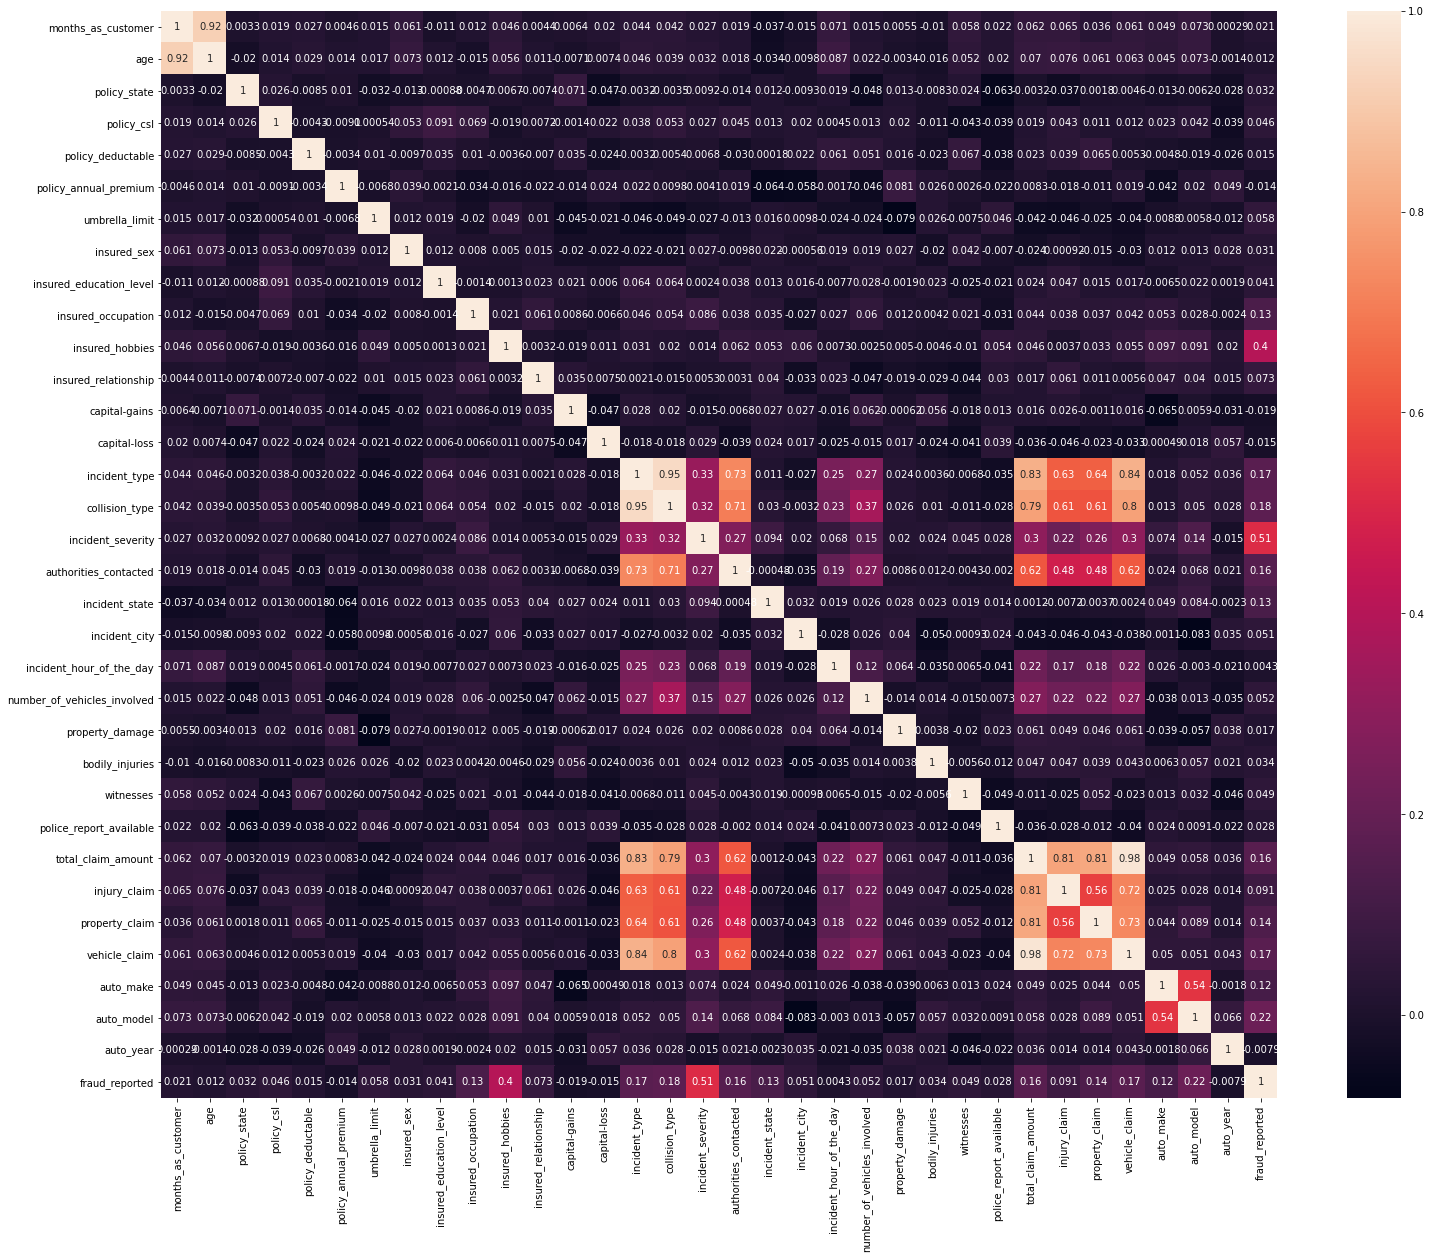

In [69]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(corrmat, annot=True)
plt.show()

In [206]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3, random_state=256)

In [207]:
pd.Series(train['fraud_reported']).value_counts()

0    525
1    175
Name: fraud_reported, dtype: int64

In [208]:
pd.Series(test['fraud_reported']).value_counts()

0    228
1     72
Name: fraud_reported, dtype: int64

In [209]:
# Exporting the dataset
train.to_csv('train_1.csv', sep=';', index=False)
test.to_csv('test_1.csv', sep=';', index=False)

In [104]:
X_train = train.iloc[:, :-1].values 
X_test = test.iloc[:, :-1].values
y_train = train.iloc[:, -1].values
y_test = test.iloc[:, -1].values

In [105]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

# Logistic Regression

Логистическая регрессия от всех переменных:

In [106]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 13).fit(X_train, y_train)

In [107]:
# Predicting the Test set results
y_pred = lr.predict(X_test)
lr.score(X_test,y_test)

0.89

In [108]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[212  16]
 [ 17  55]]


In [109]:
Error_rate = (17+16)/(300)
Error_rate

0.11

In [110]:
Se = 55/(55+17)
Se

0.7638888888888888

In [111]:
Sp = 212/(212+16)
Sp

0.9298245614035088

LogisticRegression: ROC AUC=0.937


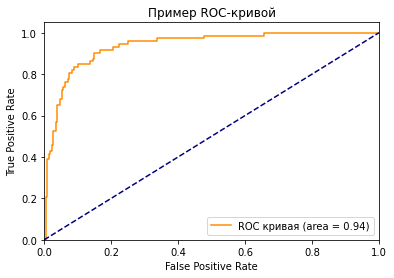

In [112]:

import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

lr_probs = lr.predict_proba(X_test)
# сохраняем вероятности только для положительного исхода
lr_probs = lr_probs[:, 1]
# рассчитываем ROC AUC
lr_auc = roc_auc_score(y_test, lr_probs)
print('LogisticRegression: ROC AUC=%.3f' % (lr_auc))
# рассчитываем roc-кривую
fpr, tpr, treshold = roc_curve(y_test, lr_probs)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Пример ROC-кривой')
plt.legend(loc="lower right")
plt.show()

# Logistic Regression2
на отобранных переменных

In [113]:
# Baseline model
import statsmodels.api as sm
lr = sm.Logit(y_train, X_train).fit()
print(lr.summary2())

Optimization terminated successfully.
         Current function value: 0.501118
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.109     
Dependent Variable: y                AIC:              767.5645  
Date:               2021-12-11 13:48 BIC:              917.7502  
No. Observations:   700              Log-Likelihood:   -350.78   
Df Model:           32               LL-Null:          -393.63   
Df Residuals:       667              LLR p-value:      8.5535e-07
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025     0.975]
-------------------------------------------------------------------
x1        0.1916     0.2432    0.7880   0.4307    -0.2850    0.6683
x2       -0.2178     0.2428   -0.8969   0.3698    -0.6937 

In [114]:
# Automatic Feature Selection
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
estimator=LogisticRegression(random_state=123)
selector=RFECV(estimator, step=1)
selector=selector.fit(X_train, y_train)
print(selector.n_features_)
print(selector.support_)
print(selector.ranking_)

12
[ True  True False False False False False False False  True  True  True
 False False  True  True  True  True  True  True False False False False
 False False False False False False False  True False]
[ 1  1 17  7 18 21  8 16 14  1  1  1 15  4  1  1  1  1  1  1 22  2 11 20
  9 12 19  5  6 10  3  1 13]


In [115]:
# Selected Features
selected_columns=[]
for i in range(len(X_train[0])):
    if selector.support_[i]==1:
        selected_columns.append(i)
print(selected_columns)
print('№\tIndex\tFeature')
i=0
for column in selected_columns:
    print(str(i)+'\t'+str(column)+'\t'+str(df.columns[column]))
    i=i+1

[0, 1, 9, 10, 11, 14, 15, 16, 17, 18, 19, 31]
№	Index	Feature
0	0	months_as_customer
1	1	age
2	9	insured_occupation
3	10	insured_hobbies
4	11	insured_relationship
5	14	incident_type
6	15	collision_type
7	16	incident_severity
8	17	authorities_contacted
9	18	incident_state
10	19	incident_city
11	31	auto_model


In [210]:
# p-value < 3% Features
bas_X_train = X_train[:,[10,16,18,31]]
bas_X_test = X_test[:,[10,16,18,31]]

In [211]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
bas = LogisticRegression(random_state = 13).fit(bas_X_train, y_train)

In [212]:
# Predicting the Test set results
y_bas_pred = bas.predict(bas_X_test)
bas.score(bas_X_test,y_test)

0.89

In [213]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_bas_pred)
print(cm)

[[211  17]
 [ 16  56]]


In [214]:
Error_rate = (16+17)/(300)
Error_rate

0.11

In [215]:
Se = 56/(56+16)
Se

0.7777777777777778

In [216]:
Sp = 211/(211+17)
Sp

0.9254385964912281